# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from boruta import BorutaPy
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from yellowbrick.classifier import ROCAUC


## 0. Global Settings

In [2]:
sns.set_style('darkgrid')

pd.set_option('max_columns', 100)
pd.set_option('max_rows', 50)
pd.set_option('min_rows', 20)
pd.set_option('precision', 2) # número de casas decimais nos dataframes
pd.options.display.float_format = '{:.2f}'.format # notação científica

In [3]:
%matplotlib inline

%pylab inline

plt.style.use( 'bmh' )
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 24

#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
pd.set_option('display.expand_frame_repr', False)

sns.set()

sns.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


# 1.0

In [4]:
df1 = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [5]:
df1.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II


In [6]:
print(f'O dataset possui {df1.shape[0]} linhas e {df1.shape[1]} colunas')

O dataset possui 2111 linhas e 17 colunas


In [7]:
df1.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


In [8]:
df1.isna().sum().sum()

0

In [9]:
df1.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [10]:
df1.dtypes.value_counts()

object     9
float64    8
dtype: int64

In [11]:
num_attr = df1.select_dtypes(exclude='object')
cat_attr = df1.select_dtypes(include='object')

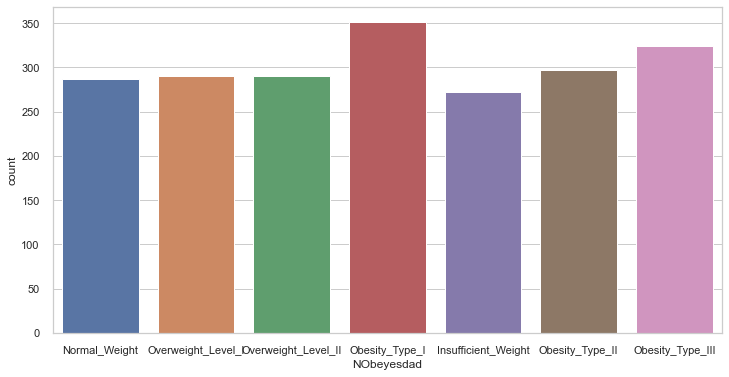

In [12]:
sns.countplot(x=df1['NObeyesdad']);

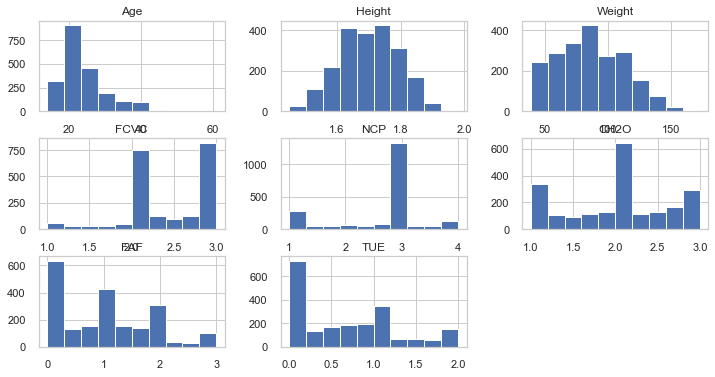

In [13]:
df1.hist();

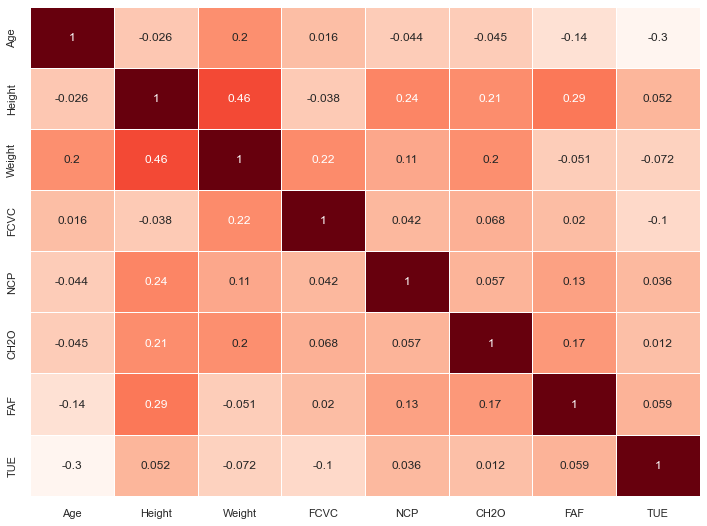

In [14]:
# Verificando correlação entre as características
corr_input_var = num_attr.corr()

fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_input_var, annot=True, cbar=False, cmap='Reds', linewidths=.5, ax=ax);

In [15]:
df1.describe(include='object') 

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


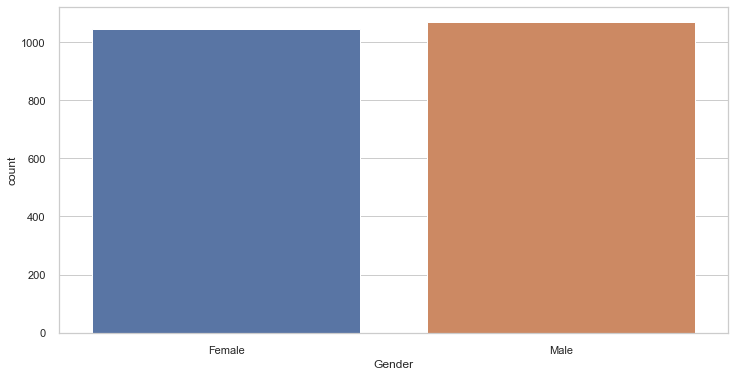

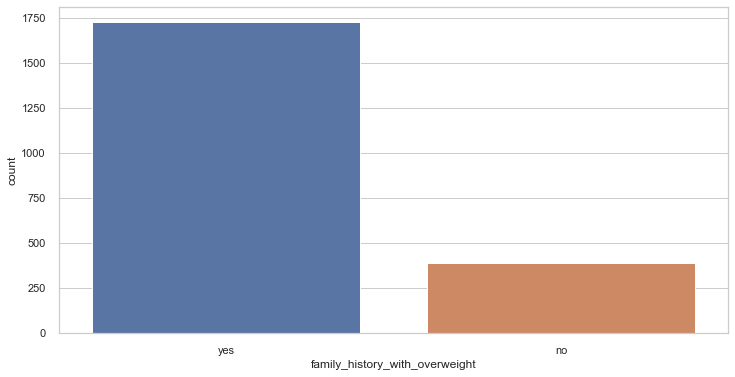

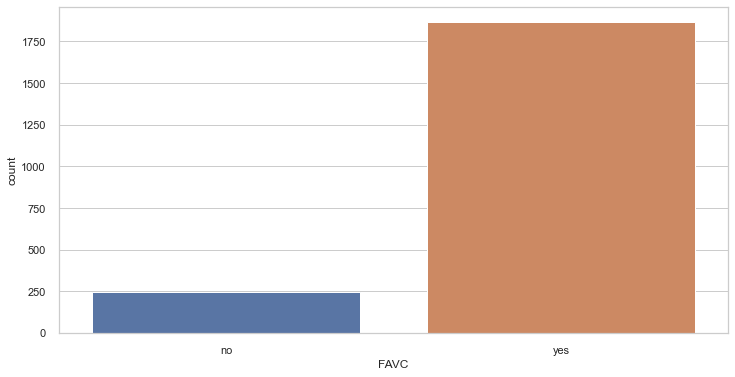

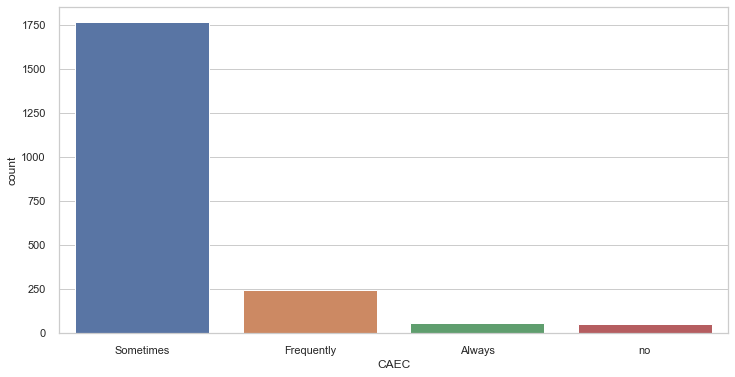

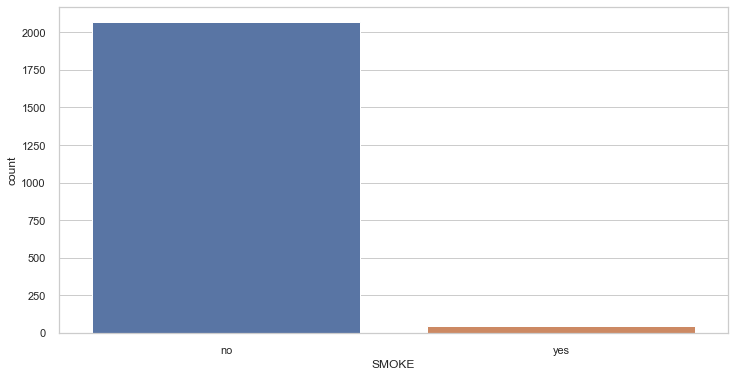

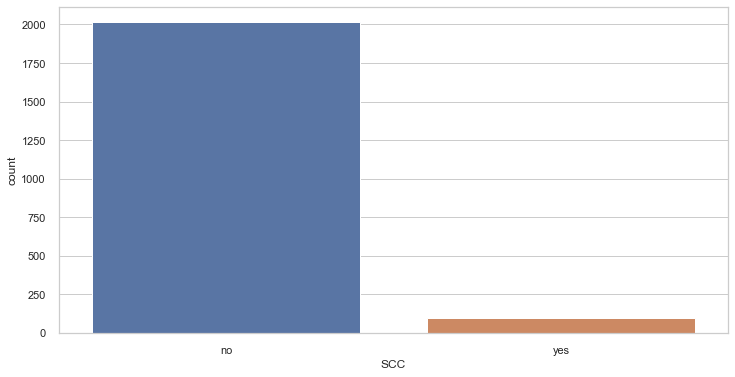

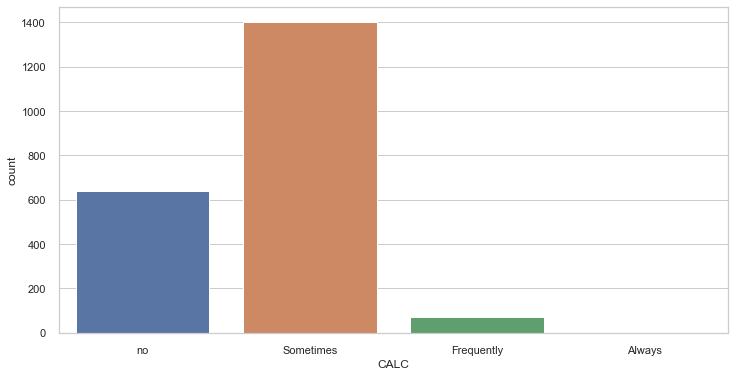

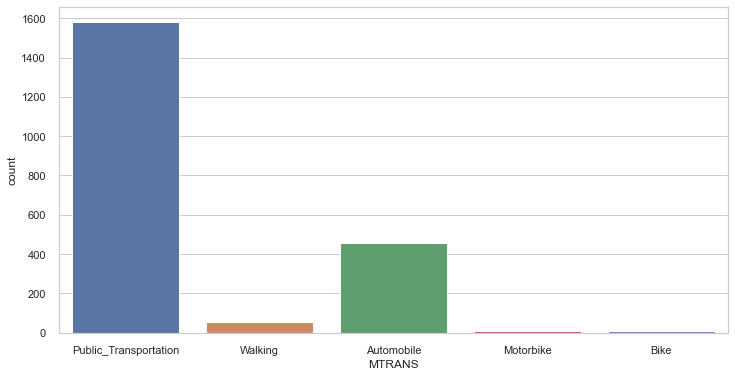

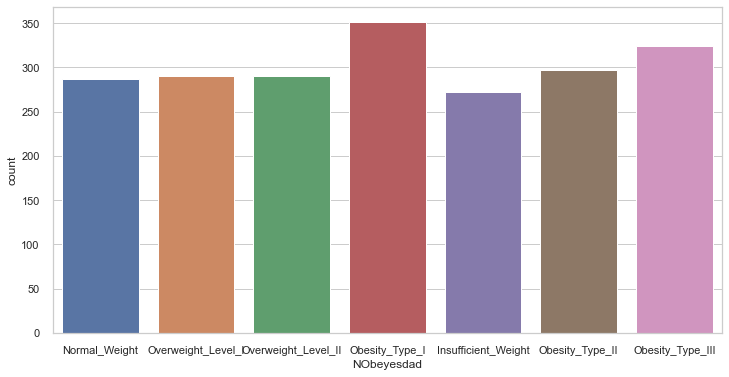

In [16]:
for column in df1.select_dtypes(include='object'):
    if df1[column].nunique() < 10:
        sns.countplot(x=column, data=df1)
        plt.show()

In [17]:
for col in df1.select_dtypes(include='object'):
    if df1[col].nunique() <=4:
        display(pd.crosstab(df1['NObeyesdad'], df1[col], normalize='index'))
        #display(pd.crosstab(df1['NObeyesdad'], df1[col]))

Gender,Female,Male
NObeyesdad,,
Insufficient_Weight,0.64,0.36
Normal_Weight,0.49,0.51
Obesity_Type_I,0.44,0.56
Obesity_Type_II,0.01,0.99
Obesity_Type_III,1.00,0.00
Overweight_Level_I,0.50,0.50
Overweight_Level_II,0.36,0.64


family_history_with_overweight,no,yes
NObeyesdad,,
Insufficient_Weight,0.54,0.46
Normal_Weight,0.46,0.54
Obesity_Type_I,0.02,0.98
Obesity_Type_II,0.00,1.00
Obesity_Type_III,0.00,1.00
Overweight_Level_I,0.28,0.72
Overweight_Level_II,0.06,0.94


FAVC,no,yes
NObeyesdad,,
Insufficient_Weight,0.19,0.81
Normal_Weight,0.28,0.72
Obesity_Type_I,0.03,0.97
Obesity_Type_II,0.02,0.98
Obesity_Type_III,0.00,1.00
Overweight_Level_I,0.08,0.92
Overweight_Level_II,0.26,0.74


CAEC,Always,Frequently,Sometimes,no
NObeyesdad,,,,
Insufficient_Weight,0.01,0.44,0.54,0.01
Normal_Weight,0.12,0.29,0.55,0.03
Obesity_Type_I,0.02,0.02,0.96,0.00
Obesity_Type_II,0.01,0.00,0.99,0.00
Obesity_Type_III,0.00,0.00,1.00,0.00
Overweight_Level_I,0.02,0.05,0.81,0.12
Overweight_Level_II,0.01,0.06,0.93,0.00


SMOKE,no,yes
NObeyesdad,,
Insufficient_Weight,1.00,0.00
Normal_Weight,0.95,0.05
Obesity_Type_I,0.98,0.02
Obesity_Type_II,0.95,0.05
Obesity_Type_III,1.00,0.00
Overweight_Level_I,0.99,0.01
Overweight_Level_II,0.98,0.02


SCC,no,yes
NObeyesdad,,
Insufficient_Weight,0.92,0.08
Normal_Weight,0.90,0.10
Obesity_Type_I,0.99,0.01
Obesity_Type_II,1.00,0.00
Obesity_Type_III,1.00,0.00
Overweight_Level_I,0.87,0.13
Overweight_Level_II,0.99,0.01


CALC,Always,Frequently,Sometimes,no
NObeyesdad,,,,
Insufficient_Weight,0.00,0.00,0.57,0.43
Normal_Weight,0.00,0.06,0.56,0.37
Obesity_Type_I,0.00,0.04,0.49,0.47
Obesity_Type_II,0.00,0.01,0.75,0.24
Obesity_Type_III,0.00,0.00,1.00,0.00
Overweight_Level_I,0.00,0.06,0.77,0.17
Overweight_Level_II,0.00,0.07,0.49,0.44


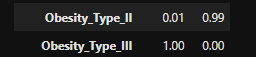

In [18]:
### Verificando frequência relativa entre atributos categóricos com menos de 5 valores distintos
for col in df1.drop('NObeyesdad', axis=1).select_dtypes(include='object'):
    if df1[col].nunique() <=4:
        display(pd.crosstab(df1['NObeyesdad'], df1[col], normalize='index'))

Gender,Female,Male
NObeyesdad,,
Insufficient_Weight,0.64,0.36
Normal_Weight,0.49,0.51
Obesity_Type_I,0.44,0.56
Obesity_Type_II,0.01,0.99
Obesity_Type_III,1.00,0.00
Overweight_Level_I,0.50,0.50
Overweight_Level_II,0.36,0.64


family_history_with_overweight,no,yes
NObeyesdad,,
Insufficient_Weight,0.54,0.46
Normal_Weight,0.46,0.54
Obesity_Type_I,0.02,0.98
Obesity_Type_II,0.00,1.00
Obesity_Type_III,0.00,1.00
Overweight_Level_I,0.28,0.72
Overweight_Level_II,0.06,0.94


FAVC,no,yes
NObeyesdad,,
Insufficient_Weight,0.19,0.81
Normal_Weight,0.28,0.72
Obesity_Type_I,0.03,0.97
Obesity_Type_II,0.02,0.98
Obesity_Type_III,0.00,1.00
Overweight_Level_I,0.08,0.92
Overweight_Level_II,0.26,0.74


CAEC,Always,Frequently,Sometimes,no
NObeyesdad,,,,
Insufficient_Weight,0.01,0.44,0.54,0.01
Normal_Weight,0.12,0.29,0.55,0.03
Obesity_Type_I,0.02,0.02,0.96,0.00
Obesity_Type_II,0.01,0.00,0.99,0.00
Obesity_Type_III,0.00,0.00,1.00,0.00
Overweight_Level_I,0.02,0.05,0.81,0.12
Overweight_Level_II,0.01,0.06,0.93,0.00


SMOKE,no,yes
NObeyesdad,,
Insufficient_Weight,1.00,0.00
Normal_Weight,0.95,0.05
Obesity_Type_I,0.98,0.02
Obesity_Type_II,0.95,0.05
Obesity_Type_III,1.00,0.00
Overweight_Level_I,0.99,0.01
Overweight_Level_II,0.98,0.02


SCC,no,yes
NObeyesdad,,
Insufficient_Weight,0.92,0.08
Normal_Weight,0.90,0.10
Obesity_Type_I,0.99,0.01
Obesity_Type_II,1.00,0.00
Obesity_Type_III,1.00,0.00
Overweight_Level_I,0.87,0.13
Overweight_Level_II,0.99,0.01


CALC,Always,Frequently,Sometimes,no
NObeyesdad,,,,
Insufficient_Weight,0.00,0.00,0.57,0.43
Normal_Weight,0.00,0.06,0.56,0.37
Obesity_Type_I,0.00,0.04,0.49,0.47
Obesity_Type_II,0.00,0.01,0.75,0.24
Obesity_Type_III,0.00,0.00,1.00,0.00
Overweight_Level_I,0.00,0.06,0.77,0.17
Overweight_Level_II,0.00,0.07,0.49,0.44


# Análise Exploratória de Dados

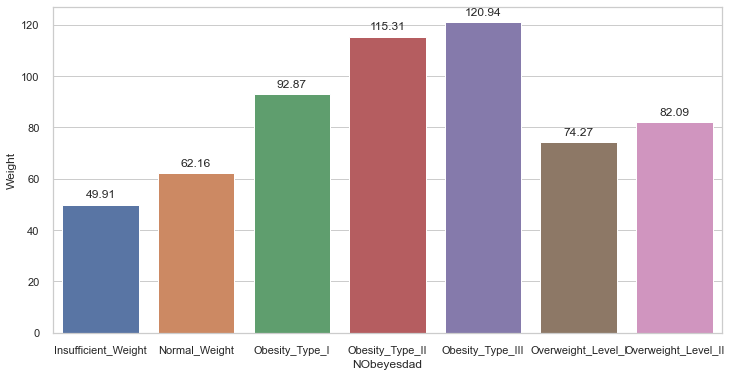

In [19]:
df_temporario = df1[['Weight', 'NObeyesdad']].groupby('NObeyesdad').mean().reset_index()
ax = sns.barplot(data=df_temporario, x='NObeyesdad', y='Weight');

# código para mostrar os valores das colunas no gráfico
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

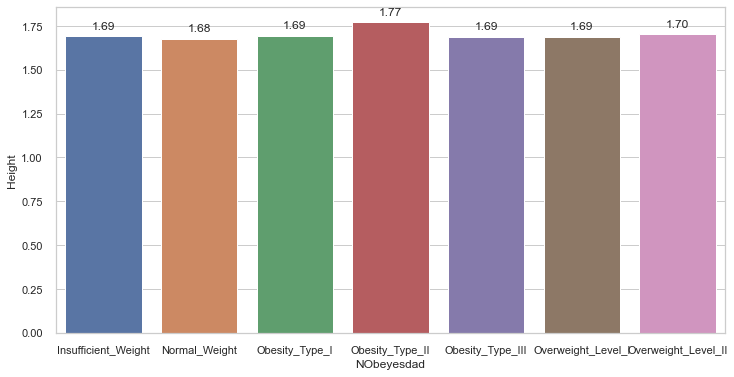

In [20]:
df_temporario = df1[['Height', 'NObeyesdad']].groupby('NObeyesdad').mean().reset_index()
ax = sns.barplot(data=df_temporario, x='NObeyesdad', y='Height');

# código para mostrar os valores das colunas no gráfico
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

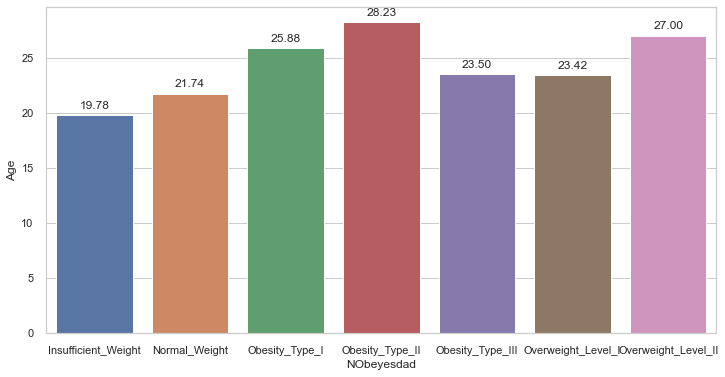

In [21]:
df_temporario = df1[['Age', 'NObeyesdad']].groupby('NObeyesdad').mean().reset_index()
ax = sns.barplot(data=df_temporario, x='NObeyesdad', y='Age');

# código para mostrar os valores das colunas no gráfico
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Pre-Processing

In [22]:
df2 = df1.copy()

## Escalonamento

In [23]:
num_attr.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')

Checando Outliers para escolher RobustScaler ou MinMaxScaler

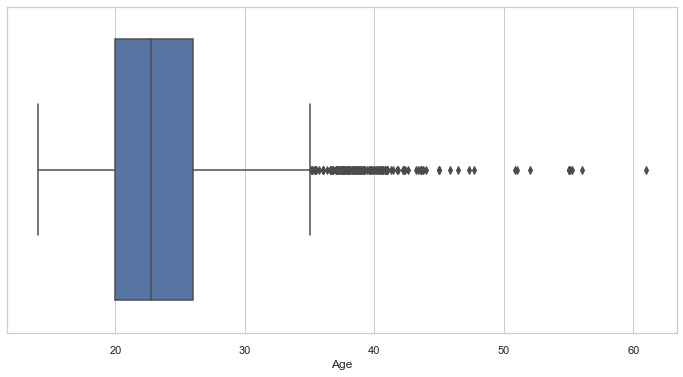

In [24]:
sns.boxplot(x = df2['Age']);

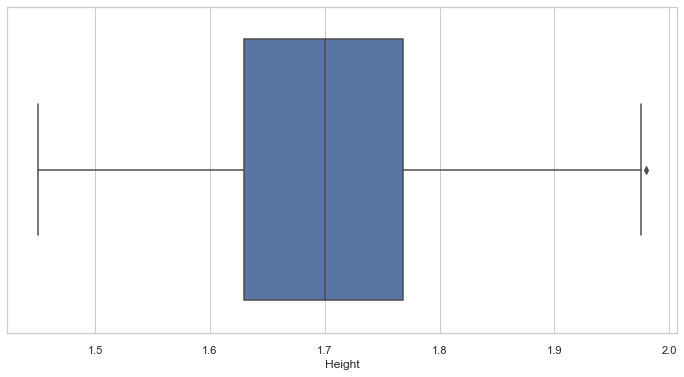

In [25]:
sns.boxplot(x = df2['Height']);

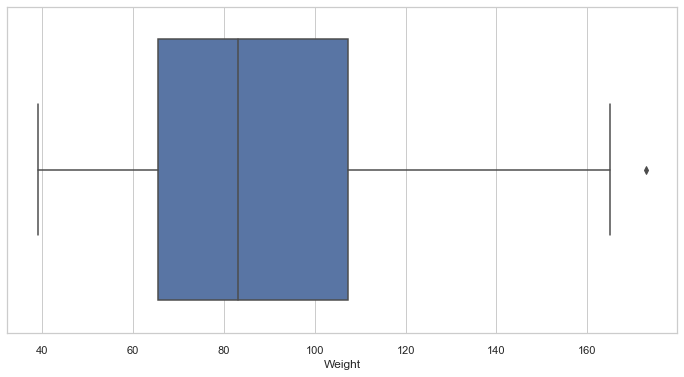

In [26]:
sns.boxplot(x = df2['Weight']);

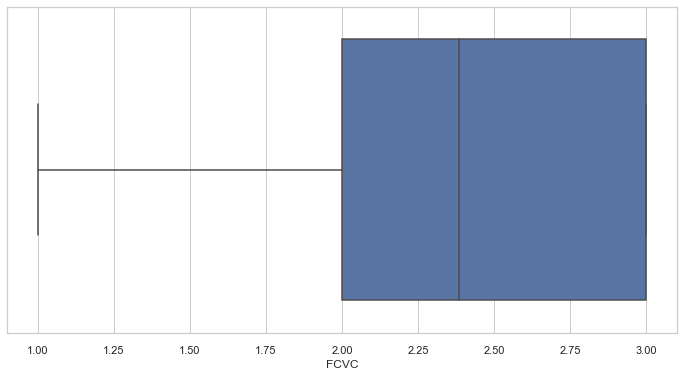

In [27]:
sns.boxplot(x = df2['FCVC']);

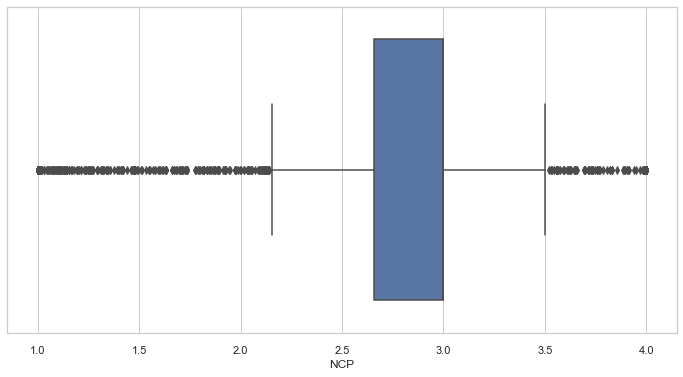

In [28]:
sns.boxplot(x = df2['NCP']);

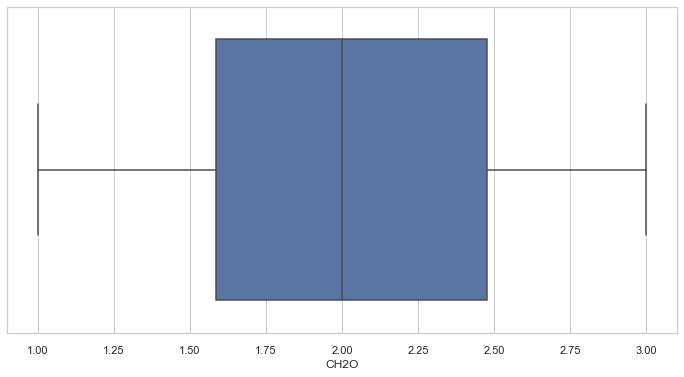

In [29]:
sns.boxplot(x = df2['CH2O']);

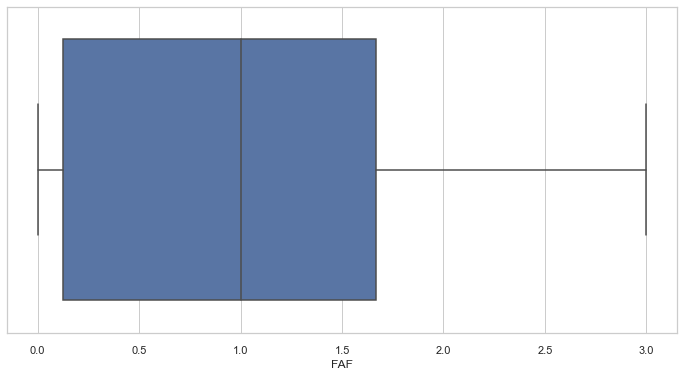

In [30]:
sns.boxplot(x = df2['FAF']);

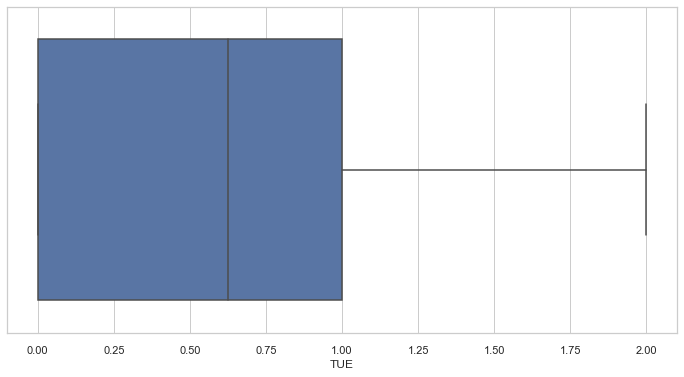

In [31]:
sns.boxplot(x = df2['TUE']);

In [32]:
rs = RobustScaler()
mms = MinMaxScaler()

df2['Age'] = rs.fit_transform(df2[['Age']])

# o robust scaler "piorou" a escala
#df2['NCP'] = rs.fit_transform(df2[['NCP']])

df2['Height'] = mms.fit_transform(df2[['Height']])

df2['Weight'] = mms.fit_transform(df2[['Weight']])

df2['FCVC'] = mms.fit_transform(df2[['FCVC']])

df2['CH2O'] = mms.fit_transform(df2[['CH2O']])

df2['FAF'] = mms.fit_transform(df2[['FAF']])

df2['TUE'] = mms.fit_transform(df2[['TUE']])

In [33]:
df2.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,-0.29,0.32,0.19,yes,no,0.50,3.00,Sometimes,no,0.50,no,0.00,0.50,no,Public_Transportation,Normal_Weight
1,Female,-0.29,0.13,0.13,yes,no,1.00,3.00,Sometimes,yes,1.00,yes,1.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,0.04,0.66,0.28,yes,no,0.50,3.00,Sometimes,no,0.50,no,0.67,0.50,Frequently,Public_Transportation,Normal_Weight
3,Male,0.70,0.66,0.36,no,no,1.00,3.00,Sometimes,no,0.50,no,0.67,0.00,Frequently,Walking,Overweight_Level_I
4,Male,-0.13,0.62,0.38,no,no,0.50,1.00,Sometimes,no,0.50,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II


## Encoding

In [34]:
cat_attr.columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [35]:
cat_attr.nunique()

Gender                            2
family_history_with_overweight    2
FAVC                              2
CAEC                              4
SMOKE                             2
SCC                               2
CALC                              4
MTRANS                            5
NObeyesdad                        7
dtype: int64

In [36]:
df2['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [37]:
temp_dict = {'Female': 1, 'Male': 0}
df2['Gender'] = df2['Gender'].map(temp_dict)

In [38]:
df2['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [39]:
temp_dict = {'yes': 1, 'no': 0}
df2['family_history_with_overweight'] = df2['family_history_with_overweight'].map(temp_dict)

In [40]:
df2['FAVC'].unique()

array(['no', 'yes'], dtype=object)

In [41]:
temp_dict = {'yes': 1, 'no': 0}
df2['FAVC'] = df2['FAVC'].map(temp_dict)

In [42]:
df2['CAEC'].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [43]:
ordinal_encoding = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df2['CAEC'] = df2['CAEC'].map(ordinal_encoding)

In [44]:
df2['SMOKE'].unique()

array(['no', 'yes'], dtype=object)

In [45]:
temp_dict = {'yes': 1, 'no': 0}
df2['SMOKE'] = df2['SMOKE'].map(temp_dict)

In [46]:
df2['SCC'].unique()

array(['no', 'yes'], dtype=object)

In [47]:
temp_dict = {'yes': 1, 'no': 0}
df2['SCC'] = df2['SCC'].map(temp_dict)

In [48]:
df2['CALC'].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [49]:
ordinal_encoding = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
df2['CALC'] = df2['CALC'].map(ordinal_encoding)

In [50]:
df2['MTRANS'].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [51]:
frequency_encoder = df2.groupby('MTRANS').size()/len(df1)
df2.loc[:, 'MTRANS'] = df2['MTRANS'].map(frequency_encoder)

In [52]:
# É PRECISO PESQUISAR SOBRE SE HÁ ALGUMA FORMA MELHOR DE FAZER O ENCODING DA VARIÁVEL ALVO

# comparar os resultados utilizando encodings diferentes para a variável alvo

df2['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [53]:
# frequency_encoder = df2.groupby('NObeyesdad').size()/len(df1)
# df2.loc[:, 'target'] = df2['NObeyesdad'].map(frequency_encoder)

In [54]:
temp_dict = {'Insufficient_Weight' : 0, 'Normal_Weight': 1, 'Overweight_Level_I': 2, 'Overweight_Level_II': 3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6}
df2['target'] = df2['NObeyesdad'].map(temp_dict)

In [55]:
df2.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,target
2098,1,0.53,0.30,0.49,1,1,1.00,3.00,1,0,0.67,0,0.02,0.28,1,0.75,Obesity_Type_III,6
709,1,-0.79,0.47,0.08,0,1,0.30,3.43,1,0,0.03,0,0.27,0.52,1,0.75,Insufficient_Weight,0
1825,1,-0.76,0.70,0.77,1,1,1.00,3.00,1,0,0.86,0,0.67,0.41,1,0.75,Obesity_Type_III,6
1734,0,1.31,0.60,0.61,1,1,0.56,3.00,1,0,0.60,0,0.33,0.78,1,0.22,Obesity_Type_II,5
1170,1,2.53,0.47,0.29,1,1,1.00,3.00,1,0,0.58,0,0.00,0.00,0,0.22,Overweight_Level_II,3


# 6.0 Feature Selection

In [56]:
df3 = df2.copy()

## 6.1 Split Dataframe into Training and Test Dataset

In [57]:
x_full, x_test, y_full, y_test = train_test_split(df2.drop(['NObeyesdad', 'target'], axis=1), df2['target'], random_state = 16, train_size=0.90)

print('\nTamanho treino: {}'.format(x_full.shape[0]))
print('Tamanho teste: {}'.format(x_test.shape[0]))


Tamanho treino: 1899
Tamanho teste: 212


In [58]:
X_train, X_val, y_train, y_val = train_test_split(x_full, y_full, random_state = 16, train_size=0.80)

print('\nTamanho treino: {}'.format(X_train.shape[0]))
print('Tamanho validação: {}'.format(X_val.shape[0]))


Tamanho treino: 1519
Tamanho validação: 380


## 6.2 Boruta as Feature Selector

In [59]:
# training and test dataset for Boruta
X_train_n = X_train.values
y_train_n = y_train.values.ravel()

In [60]:
# define RandomForestRegressor
rf = RandomForestClassifier(n_jobs=-2)

# define Boruta
boruta = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=42).fit(X_train_n, y_train_n)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	12
Tentative: 	0
Rejected: 	4


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	12
Tentative: 	0
Rejected: 	4


### 6.2.1 Best Features from Boruta

In [61]:
cols_selected = boruta.support_.tolist()

# best features
X_train_fs = X_train
cols_selected_boruta = X_train_fs.iloc[:, cols_selected].columns.to_list()

# not selected boruta
cols_not_selected_boruta = list(np.setdiff1d(X_train_fs.columns, cols_selected_boruta))

In [62]:
cols_selected_boruta

['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FCVC',
 'NCP',
 'CAEC',
 'CH2O',
 'FAF',
 'TUE',
 'CALC']

In [63]:
cols_not_selected_boruta

['FAVC', 'MTRANS', 'SCC', 'SMOKE']

### 6.2.1 Best Features from Boruta

## 6.3 Manual Feature Selection

In [64]:
# foram incluídos os senos do month e do week_of_year, pois não faz sentido ter as funções de cos sem ter o seno no modelo, pois elas juntas é que representam as variáveis originais
cols_selected_boruta = ['Gender',
 'Age',
 'Height',
 'Weight',
 'family_history_with_overweight',
 'FCVC',
 'NCP',
 'CAEC',
 'CH2O',
 'FAF',
 'TUE',
 'CALC']

target = df2['target']

## 6.4 Seleção por Importância

### 6.4.1 Feature Selection Using Random Forest Classifier

In [65]:
# model
rf = RandomForestClassifier(n_estimators=100, n_jobs=-5, random_state=42 ).fit(X_train_n, y_train_n)

In [66]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Weight,0.35
Height,0.10
Age,0.10
FCVC,0.08
Gender,0.05
NCP,0.05
CH2O,0.04
FAF,0.04
TUE,0.04
CAEC,0.03


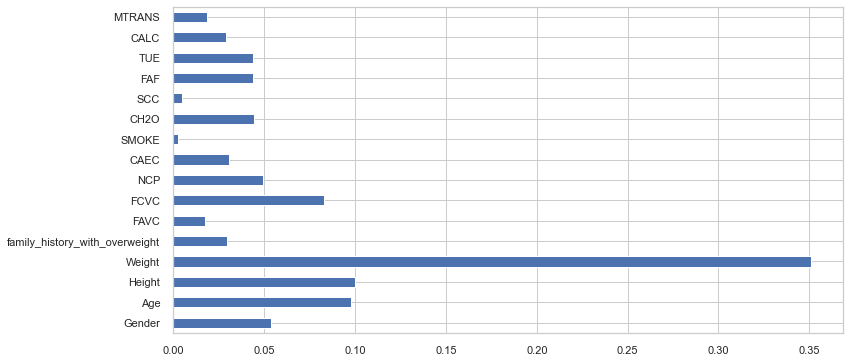

In [67]:
pd.Series(rf.feature_importances_, index=X_train.columns).plot(kind='barh');

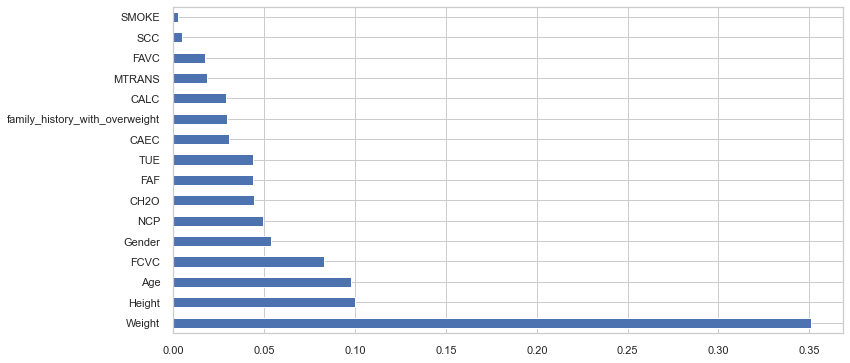

In [68]:
pd.Series(rf.feature_importances_, index=X_train.columns).nlargest(len(X_train.columns)).plot(kind='barh');

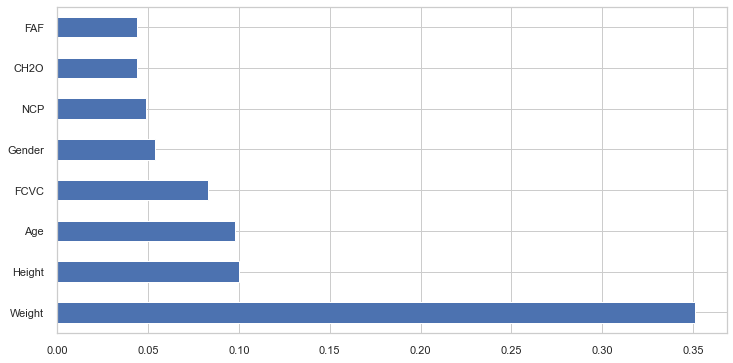

In [69]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh');

### 6.4.2 Feature Selection Using Extra-Trees Classifier

In [70]:
et = ExtraTreesClassifier(n_jobs=-5)
et.fit(X_train_n, y_train_n)

feature_importances = pd.DataFrame(et.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Weight,0.28
Age,0.08
Height,0.08
Gender,0.08
FCVC,0.07
NCP,0.06
CALC,0.05
TUE,0.05
family_history_with_overweight,0.05
CH2O,0.04


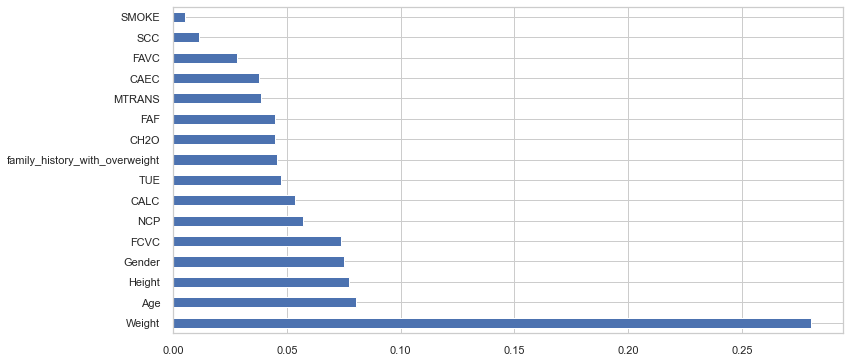

In [71]:
feat_importances = pd.Series(et.feature_importances_, X_train.columns)
feat_importances.nlargest(17).plot(kind='barh');

# .0 Machine Learning Modelling

In [72]:
x_full_select, x_test_select, y_full_select, y_test_select = train_test_split(df2.drop(['NObeyesdad', 'target', 'SMOKE', 'SCC'], axis=1), df2['target'], random_state = 16, train_size=0.90)

print('\nTamanho treino: {}'.format(x_full_select.shape[0]))
print('Tamanho teste: {}'.format(x_test_select.shape[0]))


Tamanho treino: 1899
Tamanho teste: 212


In [73]:
x_full_select.shape

(1899, 14)

In [74]:
X_train, X_val, y_train, y_val = train_test_split(x_full, y_full, random_state = 16, train_size=0.80)

print('\nTamanho treino: {}'.format(X_train.shape[0]))
print('Tamanho validação: {}'.format(X_val.shape[0]))


Tamanho treino: 1519
Tamanho validação: 380


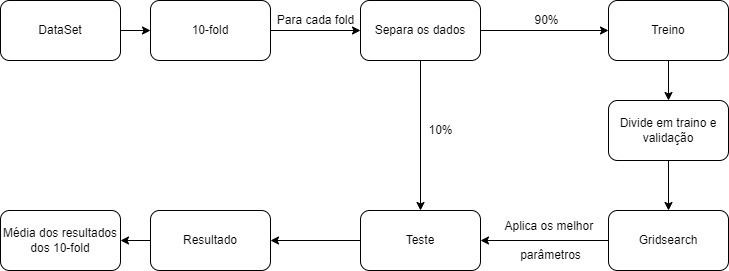

In [75]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=16)

def stratified_kfold_evaluation(skf, model):
    lst_accu_stratified = []

    for train_index, val_index in skf.split(x_full, y_full):
        model.fit(x_full.iloc[train_index], y_full.iloc[train_index])
        lst_accu_stratified.append(model.score(x_full.iloc[val_index], y_full.iloc[val_index]))
        result = model.predict(x_full.iloc[val_index])
        print(classification_report(y_full.iloc[val_index], result))

    # Print the output.
    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy That can be obtained from this model is:',
          max(lst_accu_stratified)*100, '%')
    print('\nMinimum Accuracy:',
          min(lst_accu_stratified)*100, '%')
    print('\nOverall Accuracy:',
          mean(lst_accu_stratified)*100, '%')
    print('\nStandard Deviation is:', np.std(lst_accu_stratified)*100, '%')
    
    
# inserir matrizes de confusao e a media

# inserir grid search

In [76]:
#     metrics = np.array(metrics)
#     print(f'Métrica média: {metrics.mean()}, desvio padrão: {metrics.std()}')
    
# kfold_trainning(KFold(n_splits=10))

In [77]:
def classification_report_with_accuracy_score(y_true, y_pred):
  print(classification_report(y_true, y_pred))
  return accuracy_score(y_true, y_true)

In [78]:
# kf = KFold(n_splits=10, shuffle=True, random_state=16)

# for train_index, test_index in kf.split(10):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y[train_index], y[test_index]

## .1 Dummy Model

In [79]:
dummy_pred = randint(0, 6, size=y_val.shape)
classification_report_with_accuracy_score(y_val, dummy_pred)

              precision    recall  f1-score   support

           0       0.12      0.15      0.14        46
           1       0.06      0.07      0.06        46
           2       0.16      0.19      0.17        53
           3       0.14      0.24      0.18        51
           4       0.12      0.13      0.13        62
           5       0.07      0.07      0.07        58
           6       0.00      0.00      0.00        64

    accuracy                           0.12       380
   macro avg       0.10      0.12      0.11       380
weighted avg       0.09      0.12      0.10       380



C:\Users\Wesley Sousa\.conda\envs\sidi\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wesley Sousa\.conda\envs\sidi\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Wesley Sousa\.conda\envs\sidi\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1.0

## .2 K-Nearest Neighbors (KNN)

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)
cross_validate(knn, x_full, y_full)

knn_score = cross_val_score(knn, x_full, y_full, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77        25
           1       0.38      0.24      0.29        25
           2       0.66      0.70      0.68        27
           3       0.73      0.73      0.73        26
           4       0.86      0.75      0.80        32
           5       0.89      0.92      0.91        26
           6       1.00      1.00      1.00        29

    accuracy                           0.76       190
   macro avg       0.74      0.75      0.74       190
weighted avg       0.75      0.76      0.75       190

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        25
           1       0.59      0.40      0.48        25
           2       0.89      0.63      0.74        27
           3       0.72      0.88      0.79        26
           4       0.79      0.84      0.82        32
           5       0.89      0.89      0.89        27
           6       0.96 

In [81]:
stratified_kfold_evaluation(skf, knn)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.69      0.44      0.54        25
           2       0.87      0.74      0.80        27
           3       0.61      0.85      0.71        26
           4       0.88      0.88      0.88        32
           5       0.93      0.96      0.94        26
           6       1.00      0.97      0.98        29

    accuracy                           0.83       190
   macro avg       0.83      0.82      0.82       190
weighted avg       0.83      0.83      0.82       190

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        25
           1       0.53      0.40      0.45        25
           2       0.83      0.74      0.78        27
           3       0.65      0.58      0.61        26
           4       0.83      0.91      0.87        32
           5       0.84      0.96      0.90        27
           6       1.00 

In [82]:
resultados_knn = []

for k in range (2, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    resultados_knn.append(knn.score(X_val, y_val))

In [83]:
resultados_knn

[0.8368421052631579,
 0.8473684210526315,
 0.8368421052631579,
 0.8394736842105263,
 0.8184210526315789,
 0.8,
 0.7947368421052632,
 0.7868421052631579,
 0.7710526315789473,
 0.7710526315789473,
 0.7684210526315789,
 0.7631578947368421,
 0.7631578947368421,
 0.7552631578947369,
 0.7657894736842106,
 0.7552631578947369,
 0.75,
 0.7473684210526316,
 0.7394736842105263]

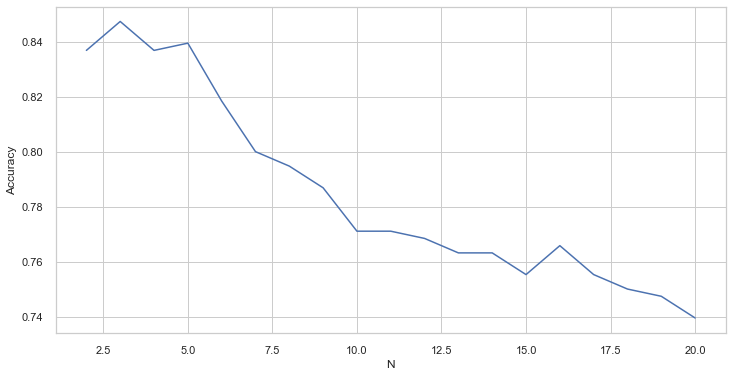

In [84]:
xticks = list(range(2, 21))
plt.xlabel('N')
plt.ylabel('Accuracy')
#plt.xticks(ticks=xticks, labels=xticks)
#plt.set_xticks(xticks, labels=xticks)
sns.lineplot(x=xticks, y=resultados_knn);

In [85]:
(np.mean(resultados_knn), np.std(resultados_knn))

(0.7847645429362881, 0.03413670863372445)

In [86]:
knn_best = KNeighborsClassifier(n_neighbors=3)
knn_best.fit(X_train, y_train)

knn_best.score(X_val, y_val)

0.8473684210526315

In [87]:
cross_val_score(knn_best, x_full, y_full, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

              precision    recall  f1-score   support

           0       0.72      0.92      0.81        25
           1       0.62      0.52      0.57        25
           2       0.80      0.74      0.77        27
           3       0.81      0.85      0.83        26
           4       0.84      0.81      0.83        32
           5       0.96      0.92      0.94        26
           6       1.00      1.00      1.00        29

    accuracy                           0.83       190
   macro avg       0.82      0.82      0.82       190
weighted avg       0.83      0.83      0.82       190

              precision    recall  f1-score   support

           0       0.69      0.96      0.80        25
           1       0.53      0.40      0.45        25
           2       0.86      0.67      0.75        27
           3       0.73      0.92      0.81        26
           4       0.86      0.75      0.80        32
           5       0.92      0.89      0.91        27
           6       0.96 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

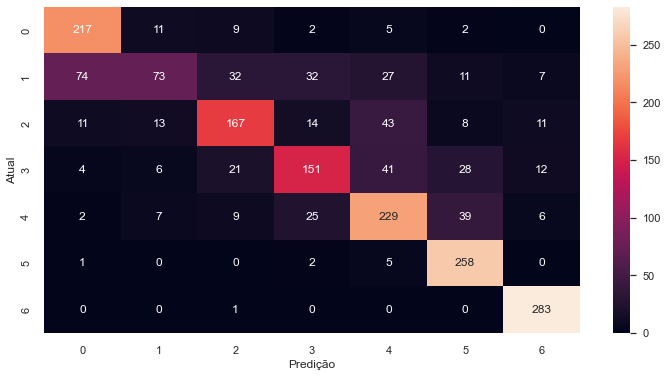

In [88]:
y_pred = cross_val_predict(knn, x_full, y_full, cv=10)
confusion_matrix_knn = pd.crosstab(y_full, y_pred, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix_knn, annot=True, fmt='d');

In [89]:
y_pred_proba = knn_best.predict_proba(X_val)

In [90]:
roc_auc_score(y_val, y_pred_proba, multi_class='ovr' )

0.9449765831024501

## .3 Decision Tree

In [111]:
dt = DecisionTreeClassifier()

In [112]:
tree_best = stratified_kfold_evaluation(skf, dt)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.92      0.92      0.92        25
           2       0.96      0.96      0.96        27
           3       0.96      0.88      0.92        26
           4       0.91      0.97      0.94        32
           5       1.00      1.00      1.00        26
           6       1.00      0.97      0.98        29

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.86      0.76      0.81        25
           2       0.77      0.89      0.83        27
           3       1.00      0.85      0.92        26
           4       0.94      0.97      0.95        32
           5       0.96      1.00      0.98        27
           6       1.00 

## .4 Random Forest

In [93]:
rf = RandomForestClassifier()

In [94]:
stratified_kfold_evaluation(skf, rf)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       0.88      0.88      0.88        25
           2       0.93      0.93      0.93        27
           3       1.00      0.92      0.96        26
           4       0.97      1.00      0.98        32
           5       0.96      1.00      0.98        26
           6       1.00      0.97      0.98        29

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.72      0.92      0.81        25
           2       1.00      0.74      0.85        27
           3       0.96      0.88      0.92        26
           4       0.94      1.00      0.97        32
           5       1.00      1.00      1.00        27
           6       1.00 

## .5 Multilayer Perceptron (MLP)

In [97]:
mlp = MLPClassifier(max_iter=5000, random_state=16)

In [98]:
stratified_kfold_evaluation(skf, mlp)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        25
           1       0.95      0.80      0.87        25
           2       0.90      0.96      0.93        27
           3       0.96      0.92      0.94        26
           4       0.94      0.97      0.95        32
           5       0.93      0.96      0.94        26
           6       1.00      0.97      0.98        29

    accuracy                           0.94       190
   macro avg       0.94      0.93      0.93       190
weighted avg       0.94      0.94      0.94       190

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        25
           1       0.79      0.88      0.83        25
           2       0.78      0.78      0.78        27
           3       0.91      0.81      0.86        26
           4       0.97      0.97      0.97        32
           5       1.00      1.00      1.00        27
           6       1.00 

## .6 Naive-Bayes

## qual o correto do sklearn? kkkkkk

In [95]:
nb = GaussianNB()

In [96]:
stratified_kfold_evaluation(skf, nb)

              precision    recall  f1-score   support

           0       0.68      0.92      0.78        25
           1       0.86      0.24      0.38        25
           2       0.40      0.15      0.22        27
           3       0.58      0.27      0.37        26
           4       0.40      0.50      0.44        32
           5       0.44      1.00      0.61        26
           6       1.00      0.97      0.98        29

    accuracy                           0.58       190
   macro avg       0.62      0.58      0.54       190
weighted avg       0.62      0.58      0.54       190

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        25
           1       0.50      0.28      0.36        25
           2       0.67      0.30      0.41        27
           3       0.60      0.23      0.33        26
           4       0.44      0.50      0.47        32
           5       0.50      1.00      0.67        27
           6       1.00 

## .7 Support Vector Machine (SVM)

In [97]:
svm = SVC()

In [98]:
stratified_kfold_evaluation(skf, svm)

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        25
           1       0.77      0.40      0.53        25
           2       0.67      0.59      0.63        27
           3       0.55      0.65      0.60        26
           4       0.71      0.75      0.73        32
           5       0.78      0.96      0.86        26
           6       1.00      0.97      0.98        29

    accuracy                           0.74       190
   macro avg       0.75      0.74      0.73       190
weighted avg       0.75      0.74      0.73       190

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        25
           1       0.65      0.52      0.58        25
           2       0.82      0.67      0.73        27
           3       0.65      0.58      0.61        26
           4       0.74      0.78      0.76        32
           5       0.79      1.00      0.89        27
           6       1.00 

# .0 Hyperparameter Fine Tuning

## .1 Grid Search

## .1.1 KNN 

In [99]:
# knn_param = [
#     {'n_neighbors': np.arange(2, 21),
#      'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#      'weights': ['uniform', 'distance'],
#      'metric': ['euclidean', 'manhattan', 'chebyshev']},
    
#      {'n_neighbors': np.arange(2, 21),
#       'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#       'weights': ['uniform', 'distance'],
#       'metric': ['seuclidean', 'mahalanobis'],
#       'metric_params': [{'V': np.cov(x_full)}]}
# ]

In [100]:
knn_param = {
    'n_neighbors': np.arange(2, 21),
     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
     'weights': ['uniform', 'distance'],
     'metric': ['euclidean', 'manhattan', 'chebyshev']
}

In [101]:
grid_search = GridSearchCV(estimator=knn, param_grid=knn_param, cv=skf.split(x_full, y_full))
grid_search.fit(x_full, y_full)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.870465051517683
{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [106]:
# {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}

## .1.2 Decision Tree

In [107]:
dt_param = {
    'max_depth': [None, 3, 5, 9, 12, 15],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': [None, 'auto', 'sqrt', 'log2']    
}

In [108]:
grid_search = GridSearchCV(estimator=dt, param_grid=dt_param, cv=skf.split(x_full, y_full))
grid_search.fit(x_full, y_full)
print(grid_search.best_score_)
print(grid_search.best_params_)

0.9499693678641046
{'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


In [109]:
# {'criterion': 'entropy', 'max_depth': 12, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

## .1.3 Random Forest

In [110]:
rf_param = {
    'max_depth': [None, 3, 5, 9, 12, 15],
    'criterion': ['gini', 'entropy'],
    'plitter': ['best', 'random'],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']    
}

rf_param = {
    'estimator__max_depth': [None, 3, 5, 9, 12, 15],
    'estimator__criterion': ['gini', 'entropy'],
    'estimator__plitter': ['best', 'random'],
    'estimator__min_samples_split': [2, 4, 6, 8],
    'estimator__min_samples_leaf': [1, 2, 3, 4, 5],
    'estimator__max_features': ['auto', 'sqrt', 'log2']    
}

In [111]:
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [112]:
grid_search = GridSearchCV(estimator=rf, param_grid=rf_param, cv=skf.split(x_full, y_full))
grid_search.fit(x_full, y_full)

ValueError: Invalid parameter estimator for estimator RandomForestClassifier(). Check the list of available parameters with `estimator.get_params().keys()`.

In [ ]:
for param in grid_search.get_params().keys():
    print(param)

## .1.4 MLP

In [ ]:
mlp_param = {
    'random_state'=16
    'activation': ['tahn', 'relu', 'identity', 'logistic'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.01, 0.001, 0.0001, 0.00001]
}

In [ ]:
grid_search = GridSearchCV(estimator=mlp, param_grid=mlp_param, cv=skf.split(x_full, y_full))
grid_search.fit(x_full, y_full)
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
# {'activation': 'identity', 'alpha': 0.01, 'solver': 'lbfgs'}

## .1.5 Naive-Bayes

In [ ]:
nb_param = {}

In [ ]:
grid_search = GridSearchCV(estimator=nb, param_grid=nb_param, cv=skf.split(x_full, y_full))
grid_search.fit(x_full, y_full)
print(grid_search.best_score_)
print(grid_search.best_params_)

## .1.6 SVM

In [ ]:
svm_param = {
    'C': [0.1, 0.3, 0.5, 0.75, 1],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

In [ ]:
grid_search = GridSearchCV(estimator=svm, param_grid=svm_param, cv=skf.split(x_full, y_full))
grid_search.fit(x_full, y_full)
print(grid_search.best_score_)
print(grid_search.best_params_)

In [ ]:
# C=1, kernel='linear'

## .2 Final Models

FAZER TABELA COM OS RESULTADOS ANTES E DEPOIS DO GRID SEARCH

E COMPARAR OS OS RESULTADOS USANDO TODOS OS FEATURES, E TIRANDO O SMOKE E OUTRO LÁ

In [ ]:
knn2 = KNeighborsClassifier(algorithm='auto', metric='manhattan', n_neighbors=4, weights='distance')
stratified_kfold_evaluation(skf, knn2)

In [ ]:
svm2 = SVC(kernel='linear')
stratified_kfold_evaluation(skf, svm2)

In [ ]:
dt2 = DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features=None, min_samples_leaf=1, min_samples_split=2, splitter='best')
stratified_kfold_evaluation(skf, dt2)

In [ ]:
mlp2 = MLPClassifier(activation='identity', alpha=0.01, solver='lbfgs', max_iter=5000, random_state=16)
stratified_kfold_evaluation(skf, mlp2)

# Rascunho

In [ ]:
best_estimator = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=4, min_samples_split=4)

best_params = [('criterion', 'entropy'),
             ('max_depth', 9),
             ('max_features', None),
             ('min_samples_leaf', 4),
             ('min_samples_split', 4),
             ('splitter', 'best')]

best_score = 0.

In [ ]:
modelo_final = best_estimator.fit(X_train_final, y_train)
modelo_final_pred = dtc.predict(X_test_final)

print(classification_report(y_test, modelo_final_pred))

In [ ]:
confusion_matrix_rf = pd.crosstab(y_test, modelo_final_pred, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d');

# Matriz de Confusão

In [ ]:
np.mean(conf_matrix,axis=0)

# tirar media das matrizes???

In [ ]:
nb = GaussianNB()
nb.fit(X_train_final, y_train)

res_nb = nb.predict(X_test_final)

In [ ]:
print(classification_report(y_test, res_nb))

In [ ]:
ax = pl.subplot()
labels = ['Requeima', 'Refugo']

confusion_matrix = pd.crosstab(y_test, res_nb, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix, annot=True, fmt='d');

## 6.3 Árvore de decisão

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtc = dtc.fit(X_train_final, y_train)

res_dtc = dtc.predict(X_test_final)

print(classification_report(y_test, res_dtc))

In [ ]:
confusion_matrix_dtc = pd.crosstab(y_test, res_dtc, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix_dtc, annot=True, fmt='d');

In [ ]:
arvore = DecisionTreeClassifier(criterion='entropy', max_depth=3)
cross_validate(arvore, X_full, y_full)

arvore_score = cross_val_score(arvore, X_full, y_full, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

## 6.4 Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=200)
cross_validate(rf, X_full, y_full)

rf_score = cross_val_score(rf, X_full, y_full, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

In [ ]:
rf.fit(X_train_final, y_train)
res_rf = rf.predict(X_test_final)

In [ ]:
confusion_matrix_rf = pd.crosstab(y_test, res_rf, rownames=['Atual'], colnames=['Predição'])
sns.heatmap(confusion_matrix_rf, annot=True, fmt='d');

# Métricas

## 7.1 Curva ROC e AUC

In [102]:
y_pred_proba = knn_best.predict_proba(X_val)

C:\Users\Wesley Sousa\.conda\envs\sidi\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


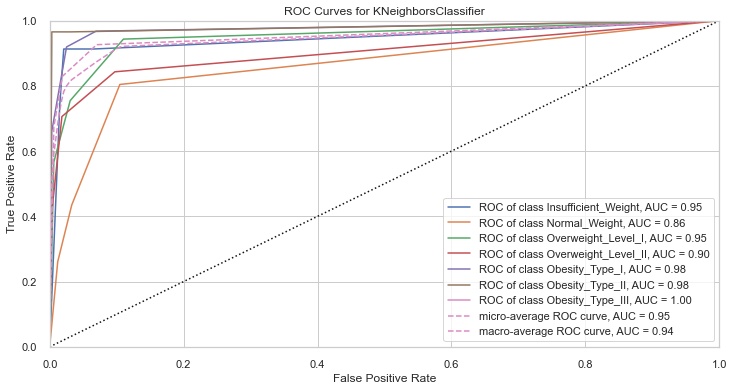

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [104]:
visualizer = ROCAUC(knn_best, encoder={     0 : 'Insufficient_Weight', 
                                            1 : 'Normal_Weight', 
                                            2 : 'Overweight_Level_I', 
                                            3 : 'Overweight_Level_II', 
                                            4 : 'Obesity_Type_I', 
                                            5 : 'Obesity_Type_II', 
                                            6 : 'Obesity_Type_III'})
    
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show()

In [109]:
y_pred_proba = tree_best.predict_proba(X_val)

AttributeError: 'NoneType' object has no attribute 'predict_proba'

In [110]:
visualizer = ROCAUC(tree_best, encoder={     0 : 'Insufficient_Weight', 
                                            1 : 'Normal_Weight', 
                                            2 : 'Overweight_Level_I', 
                                            3 : 'Overweight_Level_II', 
                                            4 : 'Obesity_Type_I', 
                                            5 : 'Obesity_Type_II', 
                                            6 : 'Obesity_Type_III'})
    
visualizer.fit(X_train, y_train)
visualizer.score(X_val, y_val)
visualizer.show()

YellowbrickTypeError: This estimator is not a classifier; try a regression or clustering score visualizer instead!

In [108]:
tree_best